### Analyzing Healthcare Data
Now, let’s import all the necessary libraries that we need to analyze the healthcare data with python:

In [1]:
# import requisite libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Now let’s read the data and have a quick look at some initial rows from the data:

In [2]:
data = pd.read_csv("E:/Analyze Healthcare Data with Python/ntrarogyaseva.csv")
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


To have a quick look at the statistics we just need to use a describe function:

In [3]:
# print summary statistics
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


Now to analyze this healthcare data in a better way we need to first look at how is the data distributed into columns. So let’s have a quick look at the columns of the dataset:

In [4]:
# display all the column names in the data
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

### Data Exploration
value_counts () is a Pandas function that can be used to print data distributions (in the specified column). Let’s start by checking the gender statistics of the data:

In [5]:
# Display the counts of each value in the SEX column
data['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

It appears that there are duplicate values ​​in this column. Male and MALE are not two different sexes. We can substitute the column names to resolve this issue. I will also rename Male (Child) -> Boy and Female (Child) -> Girl for convenience:

In [6]:
# mappings to standardize and clean the values
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}
# replace values using the defined mappings
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

Viewing the above distribution can be done easily using Pandas’ built-in plot feature:

<AxesSubplot:>

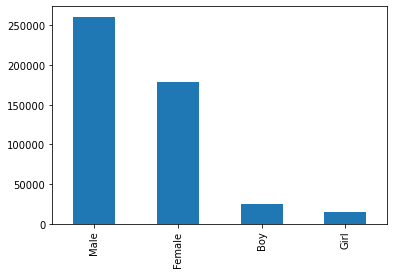

In [7]:
# plot the value counts of sex 
data['SEX'].value_counts().plot.bar()

Now let’s have a look at the age distribution by using the mean, median and mode:

In [8]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Mean: 44.91226380480646
Median: 47.0
Mode: 0    0
Name: AGE, dtype: int64


Top 10 current ages of data:

In [9]:
# print the top 10 ages
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: AGE, dtype: int64

Boxplots are commonly used to visualize a distribution when bar charts or point clouds are too difficult to understand:

<AxesSubplot:xlabel='AGE'>

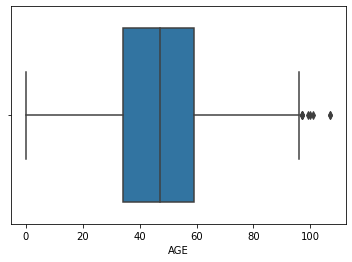

In [10]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(data['AGE'])

### Analyze Healthcare Data Deeply
What if I wanted to analyze only the records relating to Krishna district? I should select a subset of data to continue. Fortunately, Pandas can help us do this too, in two steps: 1. Condition to be satisfied: data [‘DISTRICT_NAME’] == ‘Krishna’ 2. Insertion of the condition in the dataframe: data [data [‘DISTRICT_NAME’] == “Krishna”]:

In [11]:
# subset involving only records of Krishna district
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,...,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,...,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,...,135000,Karumuri Hospital,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,...,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D


Now, if we want the most common surgery, at the district level, this can be done by going through all the district names and selecting the data subset for that district:

In [12]:
# Most common surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}nDisease and Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

District: SrikakulamnDisease and Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
District: KurnoolnDisease and Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
District: VizianagaramnDisease and Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
District: GunturnDisease and Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
District: VishakhapatnamnDisease and Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
District: West GodavarinDisease and Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
District: KrishnanDisease and Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
District: East GodavarinDisease and Count: Surgical Correction Of Longbone Fracture    6998
Name: SURGERY, dtype: int64
District: PrakasamnDisease and Count: Maintenance Hemodialysis For Crf    6215
Name: SURGERY, 

We note that only two surgeries dominate all the districts: Dialysis (7 districts) Long bone fracture (6 districts).

Now, let’s have a look at the average claim amount district wise:

In [13]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}nAverage Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

District: SrikakulamnAverage Claim Amount: ₹25593.712618634367
District: KurnoolnAverage Claim Amount: ₹28598.91853309593
District: VizianagaramnAverage Claim Amount: ₹25097.78006899492
District: GunturnAverage Claim Amount: ₹31048.73950729927
District: VishakhapatnamnAverage Claim Amount: ₹25977.94638304871
District: West GodavarinAverage Claim Amount: ₹27936.70608610806
District: KrishnanAverage Claim Amount: ₹31015.383233247547
District: East GodavarinAverage Claim Amount: ₹26166.136719737173
District: PrakasamnAverage Claim Amount: ₹28655.81036215859
District: NellorenAverage Claim Amount: ₹26105.122376744654
District: YSR KadapanAverage Claim Amount: ₹27945.216899192998
District: ChittoornAverage Claim Amount: ₹25708.102690948628
District: AnantapurnAverage Claim Amount: ₹27664.166978581827


Now let’s look at the surgery statistics to analyze this healthcare data. I will use the Pandas GroupBy concept to collect statistics by grouping data by category of surgery:

In [14]:
# group by surgery category to get mean statistics
data.groupby('CATEGORY_NAME').mean()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,220433.263365,51.764553,87052.165471,82487.123074
CARDIOLOGY,222494.427828,54.652048,33215.140211,26731.893660
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486
CRITICAL CARE,225189.278328,51.014649,69927.226196,50185.150797
DERMATOLOGY,145752.231707,46.573171,28003.012195,21728.353659
ENDOCRINOLOGY,173188.782353,45.066667,18981.376471,14875.437255
ENT SURGERY,248911.441121,32.521940,15691.907198,14938.095612
GASTROENTEROLOGY,169310.423028,41.662383,37085.464601,23798.118922
GENERAL MEDICINE,116546.798682,35.330161,30347.573939,21840.991215


Cochlear implant surgery appears to be the most expensive surgery, costing an average of ₹ 520,000. Prostheses cost ₹ 1,200, the cheapest. The youngest age group is also that of cochlear implant surgery: 1.58 years, while neurology has an average age of 56 years.